# Konsep Eigenvalues dan Eigenvectors

Eigenvalues (nilai eigen) dan eigenvectors (vektor eigen) adalah konsep fundamental dalam aljabar linear yang memiliki banyak aplikasi dalam machine learning dan data science. Notebook ini akan menjelaskan konsep eigenvalues dan eigenvectors serta aplikasinya.

## Definisi Eigenvalue dan Eigenvector

Misalkan A adalah matriks persegi n×n. Skalar λ disebut sebagai eigenvalue dari A jika terdapat vektor non-nol v (disebut eigenvector) sehingga:

$$A \vec{v} = \lambda \vec{v}$$

Secara intuitif, ketika matriks A dikalikan dengan vektor eigen v, hasilnya adalah vektor yang searah dengan v namun dengan perubahan skala sebesar λ. Dengan kata lain, transformasi linear yang direpresentasikan oleh matriks A hanya mengubah panjang (mengalikan dengan λ) tanpa mengubah arah dari v.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Buat matriks 2×2 untuk contoh
A = np.array([[4, 2],
              [1, 3]])

print("Matriks A:")
print(A)

# Hitung eigenvalues dan eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors (sebagai kolom):")
print(eigenvectors)

# Menguji hubungan Av = λv untuk eigenvalue dan eigenvector pertama
lambda1 = eigenvalues[0]
v1 = eigenvectors[:, 0]  # Eigenvector pertama (kolom pertama)

Av1 = A @ v1  # Transformasi v1 dengan matriks A
lambda_v1 = lambda1 * v1  # Kalikan v1 dengan λ1

print("\nUntuk eigenvalue λ1 =", lambda1)
print("Eigenvector v1 =", v1)
print("A × v1 =", Av1)
print("λ1 × v1 =", lambda_v1)
print("Apakah A×v1 = λ1×v1?", np.allclose(Av1, lambda_v1))

# Menguji hubungan Av = λv untuk eigenvalue dan eigenvector kedua
lambda2 = eigenvalues[1]
v2 = eigenvectors[:, 1]  # Eigenvector kedua (kolom kedua)

Av2 = A @ v2  # Transformasi v2 dengan matriks A
lambda_v2 = lambda2 * v2  # Kalikan v2 dengan λ2

print("\nUntuk eigenvalue λ2 =", lambda2)
print("Eigenvector v2 =", v2)
print("A × v2 =", Av2)
print("λ2 × v2 =", lambda_v2)
print("Apakah A×v2 = λ2×v2?", np.allclose(Av2, lambda_v2))

Matriks A:
[[4 2]
 [1 3]]

Eigenvalues:
[5. 2.]

Eigenvectors (sebagai kolom):
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]

Untuk eigenvalue λ1 = 5.0
Eigenvector v1 = [0.89442719 0.4472136 ]
A × v1 = [4.47213595 2.23606798]
λ1 × v1 = [4.47213595 2.23606798]
Apakah A×v1 = λ1×v1? True

Untuk eigenvalue λ2 = 2.0
Eigenvector v2 = [-0.70710678  0.70710678]
A × v2 = [-1.41421356  1.41421356]
λ2 × v2 = [-1.41421356  1.41421356]
Apakah A×v2 = λ2×v2? True


## Visualisasi Eigenvalues dan Eigenvectors

Mari kita visualisasikan bagaimana matriks A mentransformasikan vektor di bidang 2D, dan bagaimana eigenvector hanya diubah skalanya tanpa perubahan arah.

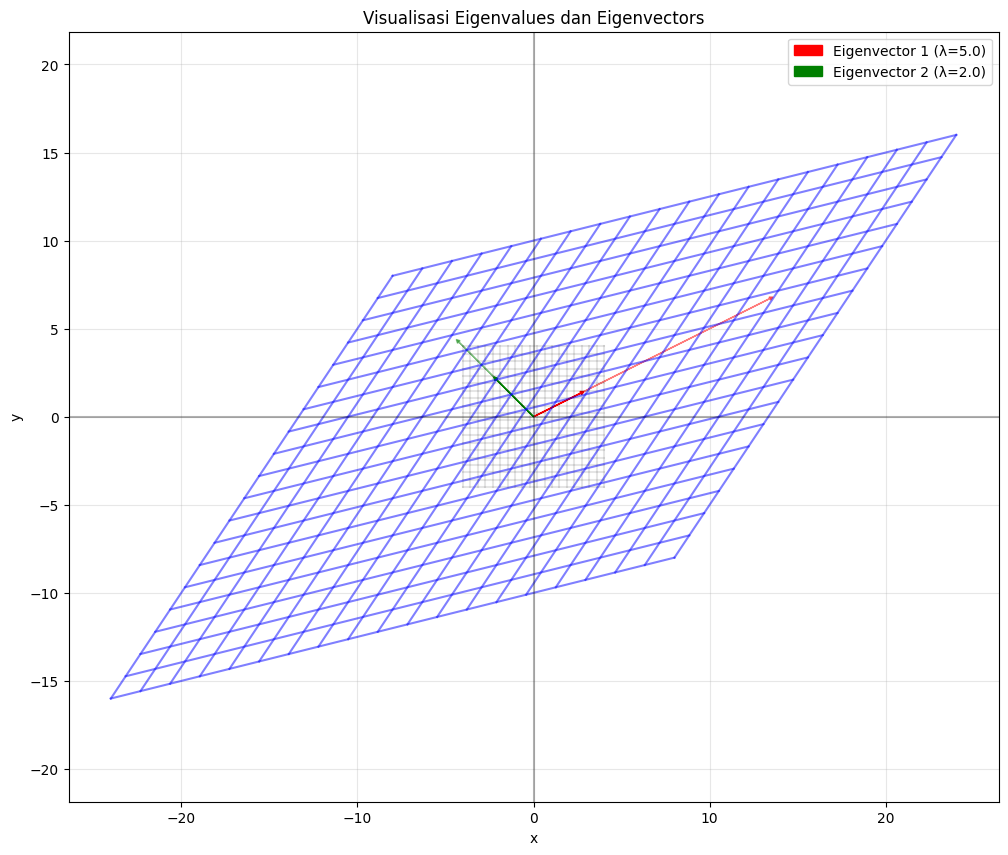


Matriks rotasi 45 derajat:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvalues:
[0.70710678+0.70710678j 0.70710678-0.70710678j]

Eigenvectors:
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


TypeError: ufunc 'hypot' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

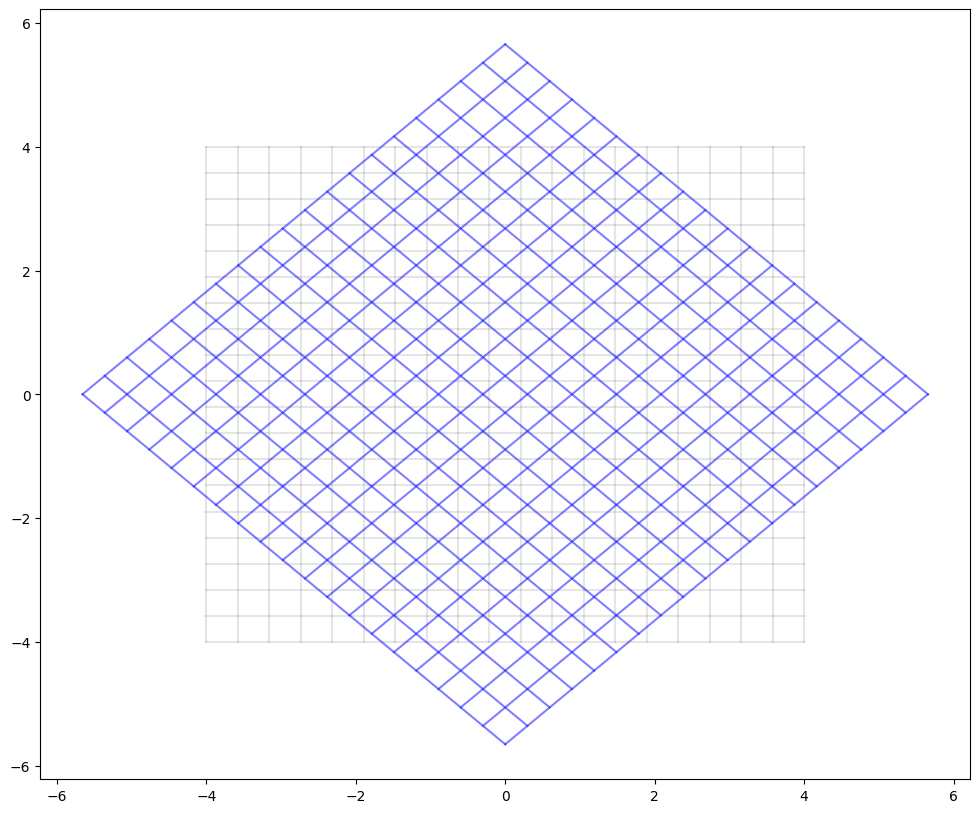

In [36]:
def visualize_eigenvectors(A, eigenvalues, eigenvectors):
    """Visualisasikan eigenvalues dan eigenvectors di bidang 2D"""
    # Buat grid untuk visualisasi transformasi
    grid_size = 20
    x = np.linspace(-4, 4, grid_size)
    y = np.linspace(-4, 4, grid_size)
    X, Y = np.meshgrid(x, y)
    
    # Ubah grid menjadi kumpulan vektor
    vectors = np.column_stack((X.ravel(), Y.ravel()))
    
    # Aplikasikan transformasi A
    transformed = np.dot(vectors, A.T)
    
    # Reshape kembali ke bentuk grid
    X_transformed = transformed[:, 0].reshape(grid_size, grid_size)
    Y_transformed = transformed[:, 1].reshape(grid_size, grid_size)
    
    # Plot
    plt.figure(figsize=(12, 10))
    
    # Plot grid asli (light gray)
    plt.plot(X, Y, 'k', alpha=0.1)
    plt.plot(X.T, Y.T, 'k', alpha=0.1)
    
    # Plot grid yang ditransformasi
    plt.plot(X_transformed, Y_transformed, 'b', alpha=0.5)
    plt.plot(X_transformed.T, Y_transformed.T, 'b', alpha=0.5)
    
    # Plot eigenvectors
    colors = ['r', 'g']
    for i in range(len(eigenvalues)):
        v = eigenvectors[:, i]
        # Normalisasi untuk visualisasi
        v_norm = v / np.linalg.norm(v) * 3
        
        # Plot eigenvector
        plt.arrow(0, 0, v_norm[0], v_norm[1], head_width=0.2, head_length=0.2, 
                 fc=colors[i], ec=colors[i], label=f'Eigenvector {i+1} (λ={eigenvalues[i]:.1f})')
        
        # Plot eigenvector yang ditransformasi (seharusnya searah, hanya berbeda skala)
        v_transformed = A @ v_norm
        plt.arrow(0, 0, v_transformed[0], v_transformed[1], head_width=0.2, head_length=0.2,
                 fc=colors[i], ec=colors[i], alpha=0.5)
    
    # Tambahkan sumbu koordinat
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.grid(alpha=0.3)
    plt.title('Visualisasi Eigenvalues dan Eigenvectors')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Visualisasikan eigenvectors untuk matriks A
visualize_eigenvectors(A, eigenvalues, eigenvectors)

# Mari lihat contoh lain: matriks rotasi 2D
theta = np.pi / 4  # Rotasi 45 derajat
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

eigen_rot = np.linalg.eig(rotation_matrix)
rot_eigenvalues, rot_eigenvectors = eigen_rot

print("\nMatriks rotasi 45 derajat:")
print(rotation_matrix)
print("\nEigenvalues:")
print(rot_eigenvalues)
print("\nEigenvectors:")
print(rot_eigenvectors)

# Visualisasikan eigenvectors untuk matriks rotasi
visualize_eigenvectors(rotation_matrix, rot_eigenvalues, rot_eigenvectors)

## Cara Menghitung Eigenvalues dan Eigenvectors

Untuk menghitung eigenvalues dan eigenvectors dari matriks A, kita harus menyelesaikan persamaan karakteristik:

$$\det(A - \lambda I) = 0$$

di mana I adalah matriks identitas. Langkah-langkahnya:

1. Bentuk matriks (A - λI)
2. Hitung determinan det(A - λI)
3. Selesaikan persamaan det(A - λI) = 0 untuk mencari nilai λ (eigenvalues)
4. Untuk setiap eigenvalue λ, temukan eigenvector v dengan menyelesaikan persamaan (A - λI)v = 0

Mari kita tunjukkan proses ini dengan contoh konkret:

Matriks B:
[[3 1]
 [1 3]]


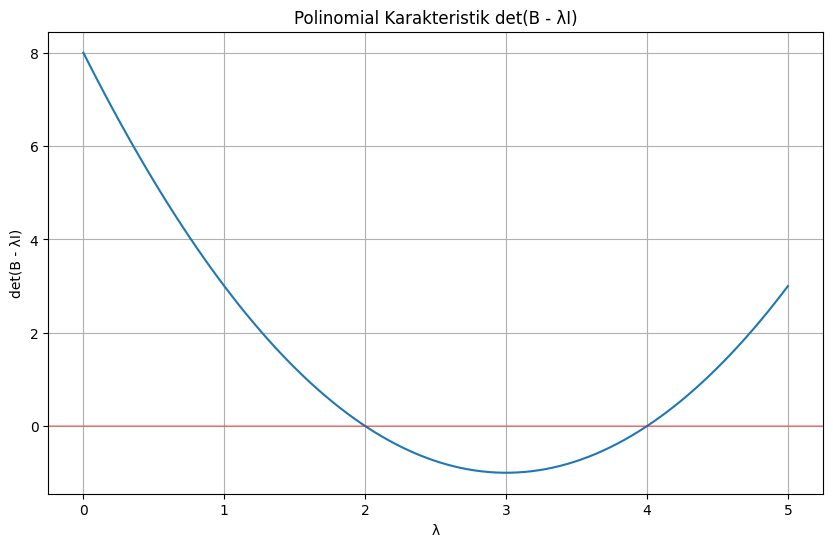


Eigenvalues (manual):
λ1 = 4.0
λ2 = 2.0

Eigenvalues (NumPy):
[4. 2.]

Eigenvector untuk λ1 (manual):
[0.70710678 0.70710678]
Eigenvector untuk λ2 (manual):
[-0.70710678  0.70710678]

Eigenvectors (NumPy):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Verifikasi untuk eigenvector pertama:
B × v1 = [2.82842712 2.82842712]
λ1 × v1 = [2.82842712 2.82842712]
Apakah B×v1 ≈ λ1×v1? True

Verifikasi untuk eigenvector kedua:
B × v2 = [-1.41421356  1.41421356]
λ2 × v2 = [-1.41421356  1.41421356]
Apakah B×v2 ≈ λ2×v2? True


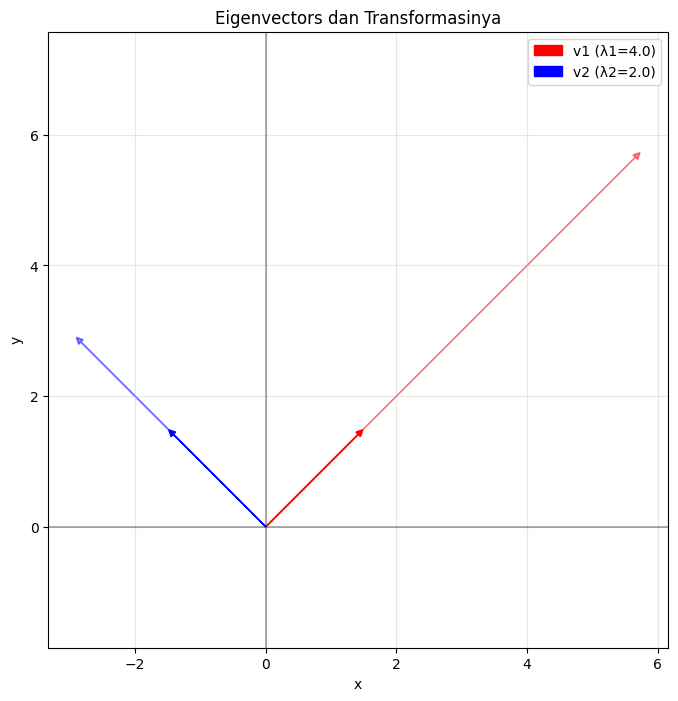

In [37]:
# Contoh perhitungan manual eigenvalues dan eigenvectors
# Matriks 2×2 sederhana
B = np.array([[3, 1],
              [1, 3]])

print("Matriks B:")
print(B)

# 1. Bentuk matriks (B - λI)
def create_characteristic_matrix(A, lambda_val):
    """Buat matriks (A - λI)"""
    n = A.shape[0]
    return A - lambda_val * np.eye(n)

# 2. Fungsi untuk menghitung determinan persamaan karakteristik
def characteristic_polynomial(A, lambda_val):
    """Hitung determinan dari (A - λI)"""
    char_matrix = create_characteristic_matrix(A, lambda_val)
    return np.linalg.det(char_matrix)

# Sekarang kita bisa mengevaluasi polinomial karakteristik untuk berbagai nilai λ
lambda_values = np.linspace(0, 5, 100)
det_values = [characteristic_polynomial(B, lambda_val) for lambda_val in lambda_values]

# Plot polinomial karakteristik
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, det_values)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True)
plt.xlabel('λ')
plt.ylabel('det(B - λI)')
plt.title('Polinomial Karakteristik det(B - λI)')
plt.show()

# 3. Menyelesaikan persamaan det(B - λI) = 0
# Untuk matriks 2×2, kita bisa menurunkan rumus eksplisit
def eigenvalues_2x2(A):
    """Hitung eigenvalues untuk matriks 2×2 menggunakan rumus kuadratik"""
    a = 1  # Koefisien λ²
    b = -(A[0, 0] + A[1, 1])  # Koefisien λ
    c = A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]  # Konstanta
    
    # Rumus kuadratik
    discriminant = b**2 - 4*a*c
    lambda1 = (-b + np.sqrt(discriminant)) / (2*a)
    lambda2 = (-b - np.sqrt(discriminant)) / (2*a)
    
    return lambda1, lambda2

# Menghitung eigenvalues untuk matriks B secara manual
lambda1_manual, lambda2_manual = eigenvalues_2x2(B)
print("\nEigenvalues (manual):")
print(f"λ1 = {lambda1_manual}")
print(f"λ2 = {lambda2_manual}")

# Verifikasi dengan NumPy
eigenvalues_B, _ = np.linalg.eig(B)
print("\nEigenvalues (NumPy):")
print(eigenvalues_B)

# 4. Mencari eigenvectors
def find_eigenvector(A, lambda_val):
    """Temukan eigenvector untuk eigenvalue tertentu"""
    # Buat matriks (A - λI)
    char_matrix = create_characteristic_matrix(A, lambda_val)
    
    # Untuk matriks 2×2, kita bisa menyelesaikan secara langsung
    # (a-λ)v1 + bv2 = 0
    # cv1 + (d-λ)v2 = 0
    
    # Jika (a-λ) ≠ 0, maka v1 = -b*v2/(a-λ)
    # Jika (a-λ) = 0, maka b*v2 = 0 → v2 = 0 (jika b ≠ 0) atau v2 bebas (jika b = 0)
    
    # Mari coba cara pertama (a-λ ≠ 0)
    a_minus_lambda = char_matrix[0, 0]
    b = char_matrix[0, 1]
    
    if abs(a_minus_lambda) > 1e-10:
        # Pilih v2 = 1 (sembarang nilai non-nol)
        v2 = 1
        v1 = -b * v2 / a_minus_lambda
        eigenvector = np.array([v1, v2])
    else:
        # Jika (a-λ) = 0, kita perlu memeriksa b
        if abs(b) > 1e-10:
            # Jika b ≠ 0, maka v2 = 0 dan v1 bebas
            v2 = 0
            v1 = 1  # Sembarang nilai non-nol
            eigenvector = np.array([v1, v2])
        else:
            # Jika b = 0, maka semua komponen bebas
            eigenvector = np.array([1, 0])  # Pilih sembarang vektor non-nol
    
    # Normalisasi eigenvector
    return eigenvector / np.linalg.norm(eigenvector)

# Mencari eigenvector untuk λ1
v1_manual = find_eigenvector(B, lambda1_manual)
print("\nEigenvector untuk λ1 (manual):")
print(v1_manual)

# Mencari eigenvector untuk λ2
v2_manual = find_eigenvector(B, lambda2_manual)
print("Eigenvector untuk λ2 (manual):")
print(v2_manual)

# Verifikasi dengan NumPy
_, eigenvectors_B = np.linalg.eig(B)
print("\nEigenvectors (NumPy):")
print(eigenvectors_B)

# Verifikasi: B × v = λ × v
print("\nVerifikasi untuk eigenvector pertama:")
print(f"B × v1 = {B @ v1_manual}")
print(f"λ1 × v1 = {lambda1_manual * v1_manual}")
print(f"Apakah B×v1 ≈ λ1×v1? {np.allclose(B @ v1_manual, lambda1_manual * v1_manual)}")

print("\nVerifikasi untuk eigenvector kedua:")
print(f"B × v2 = {B @ v2_manual}")
print(f"λ2 × v2 = {lambda2_manual * v2_manual}")
print(f"Apakah B×v2 ≈ λ2×v2? {np.allclose(B @ v2_manual, lambda2_manual * v2_manual)}")

# Visualisasi eigenvectors
plt.figure(figsize=(8, 8))

# Plot eigenvectors
plt.arrow(0, 0, v1_manual[0]*2, v1_manual[1]*2, head_width=0.1, head_length=0.1, 
         fc='red', ec='red', label=f'v1 (λ1={lambda1_manual:.1f})')
plt.arrow(0, 0, v2_manual[0]*2, v2_manual[1]*2, head_width=0.1, head_length=0.1, 
         fc='blue', ec='blue', label=f'v2 (λ2={lambda2_manual:.1f})')

# Plot transformasi eigenvectors
Bv1 = B @ v1_manual * 2
Bv2 = B @ v2_manual * 2
plt.arrow(0, 0, Bv1[0], Bv1[1], head_width=0.1, head_length=0.1, 
         fc='red', ec='red', alpha=0.5)
plt.arrow(0, 0, Bv2[0], Bv2[1], head_width=0.1, head_length=0.1, 
         fc='blue', ec='blue', alpha=0.5)

# Tambahkan grid dan axis
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('Eigenvectors dan Transformasinya')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.show()

## Sifat dan Teorema Eigenvalues dan Eigenvectors

Beberapa sifat penting dari eigenvalues dan eigenvectors:

1. **Jumlah eigenvalues**: Matriks n×n memiliki tepat n eigenvalues (termasuk kemungkinan penghitungan multiplisitas).

2. **Determinan dan trace**:
   - Determinan dari matriks sama dengan hasil kali semua eigenvalues: $\det(A) = \prod_{i=1}^{n} \lambda_i$
   - Trace dari matriks sama dengan jumlah semua eigenvalues: $\text{tr}(A) = \sum_{i=1}^{n} \lambda_i$

3. **Eigenvectors untuk eigenvalues berbeda**: Eigenvectors yang bersesuaian dengan eigenvalues yang berbeda selalu linear independen.

4. **Diagonalisasi**: Matriks A dapat didiagonalisasi jika dan hanya jika ada n eigenvectors linear independen. Dalam kasus ini, A dapat ditulis sebagai $A = PDP^{-1}$, di mana D adalah matriks diagonal dengan eigenvalues pada diagonalnya, dan P adalah matriks yang kolom-kolomnya adalah eigenvectors.

5. **Matriks simetris**: Matriks simetris (A = A^T) selalu memiliki eigenvalues real dan eigenvectors ortogonal.

Matriks C (simetris):
[[4 1 0]
 [1 3 2]
 [0 2 5]]
Apakah C = C^T? True

Eigenvalues:
[1.47108204 4.16744919 6.36146877]

1. Jumlah eigenvalues: 3 (sesuai ukuran matriks 3×3)

2. Hubungan dengan determinan dan trace:
   Determinan C = 38.99999999999999
   Hasil kali eigenvalues = 38.99999999999999
   Determinan = Hasil kali eigenvalues? True
   Trace C = 12
   Jumlah eigenvalues = 12.0
   Trace = Jumlah eigenvalues? True

3. Eigenvectors untuk matriks simetris:
   Eigenvectors (sebagai kolom):
[[-0.32530617 -0.91675668  0.23180398]
 [ 0.8226726  -0.15351016  0.54739786]
 [-0.46624638  0.36877068  0.80412841]]

   Dot product antar eigenvectors:
[[ 1.00000000e+00 -3.33066907e-16  2.22044605e-16]
 [-3.33066907e-16  1.00000000e+00 -3.33066907e-16]
 [ 2.22044605e-16 -3.33066907e-16  1.00000000e+00]]
   Eigenvectors ortogonal? (dot product ≈ 0 untuk i ≠ j)

4. Diagonalisasi: A = PDP⁻¹
   Matriks diagonal D (eigenvalues pada diagonal):
[[1.47108204 0.         0.        ]
 [0.         4.167449

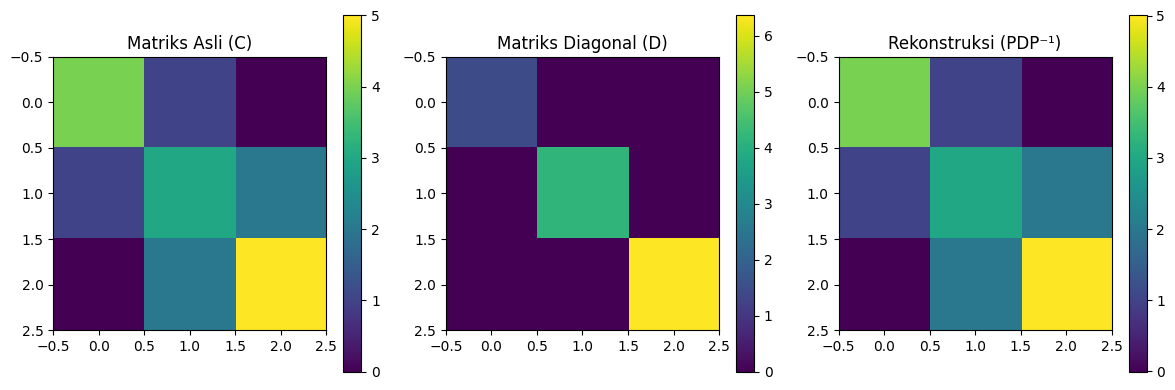

In [38]:
# Verifikasi sifat eigenvalues dan eigenvectors

# Buat contoh matriks simetris 3×3
C = np.array([[4, 1, 0],
              [1, 3, 2],
              [0, 2, 5]])

print("Matriks C (simetris):")
print(C)

# Verifikasi simetris
print("Apakah C = C^T?", np.array_equal(C, C.T))

# Hitung eigenvalues dan eigenvectors
eigenvalues_C, eigenvectors_C = np.linalg.eig(C)

print("\nEigenvalues:")
print(eigenvalues_C)

# 1. Verifikasi jumlah eigenvalues
print(f"\n1. Jumlah eigenvalues: {len(eigenvalues_C)} (sesuai ukuran matriks {C.shape[0]}×{C.shape[0]})")

# 2. Verifikasi hubungan dengan determinan dan trace
det_C = np.linalg.det(C)
trace_C = np.trace(C)

product_eigenvalues = np.prod(eigenvalues_C)
sum_eigenvalues = np.sum(eigenvalues_C)

print("\n2. Hubungan dengan determinan dan trace:")
print(f"   Determinan C = {det_C}")
print(f"   Hasil kali eigenvalues = {product_eigenvalues}")
print(f"   Determinan = Hasil kali eigenvalues? {np.isclose(det_C, product_eigenvalues)}")
print(f"   Trace C = {trace_C}")
print(f"   Jumlah eigenvalues = {sum_eigenvalues}")
print(f"   Trace = Jumlah eigenvalues? {np.isclose(trace_C, sum_eigenvalues)}")

# 3. Verifikasi eigenvectors ortogonal untuk matriks simetris
print("\n3. Eigenvectors untuk matriks simetris:")
print("   Eigenvectors (sebagai kolom):")
print(eigenvectors_C)

# Periksa ortogonalitas eigenvectors
dot_products = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        dot_products[i, j] = np.dot(eigenvectors_C[:, i], eigenvectors_C[:, j])

print("\n   Dot product antar eigenvectors:")
print(dot_products)
print("   Eigenvectors ortogonal? (dot product ≈ 0 untuk i ≠ j)")

# 4. Verifikasi diagonalisasi: A = PDP⁻¹
P = eigenvectors_C
D = np.diag(eigenvalues_C)
P_inv = np.linalg.inv(P)

# Rekonstruksi A dari P, D, dan P⁻¹
A_reconstructed = P @ D @ P_inv

print("\n4. Diagonalisasi: A = PDP⁻¹")
print("   Matriks diagonal D (eigenvalues pada diagonal):")
print(D)
print("\n   Rekonstruksi C = PDP⁻¹:")
print(A_reconstructed)
print(f"   C ≈ PDP⁻¹? {np.allclose(C, A_reconstructed)}")

# Visualisasi diagonalisasi
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(C, cmap='viridis')
plt.title('Matriks Asli (C)')
plt.colorbar()

plt.subplot(132)
plt.imshow(D, cmap='viridis')
plt.title('Matriks Diagonal (D)')
plt.colorbar()

plt.subplot(133)
plt.imshow(A_reconstructed, cmap='viridis')
plt.title('Rekonstruksi (PDP⁻¹)')
plt.colorbar()

plt.tight_layout()
plt.show()

## Aplikasi Eigenvalues dan Eigenvectors dalam Machine Learning

Eigenvalues dan eigenvectors memiliki banyak aplikasi penting dalam machine learning. Mari kita bahas beberapa contoh:

### 1. Principal Component Analysis (PCA)

PCA adalah teknik reduksi dimensi yang menggunakan eigenvectors dari matriks kovarians untuk menemukan arah-arah dengan variansi terbesar dalam data. Eigenvalues mewakili jumlah variansi yang dijelaskan oleh masing-masing komponen utama.

Dataset Iris: 150 sampel dengan 4 fitur
Nama-nama fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Matriks kovarians:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

Eigenvalues (variansi komponen utama):
[4.22824171 0.24267075 0.0782095  0.02383509]

Persentase variansi yang dijelaskan oleh setiap komponen:
[0.92461872 0.05306648 0.01710261 0.00521218]
Dua komponen pertama menjelaskan: 97.77% variansi


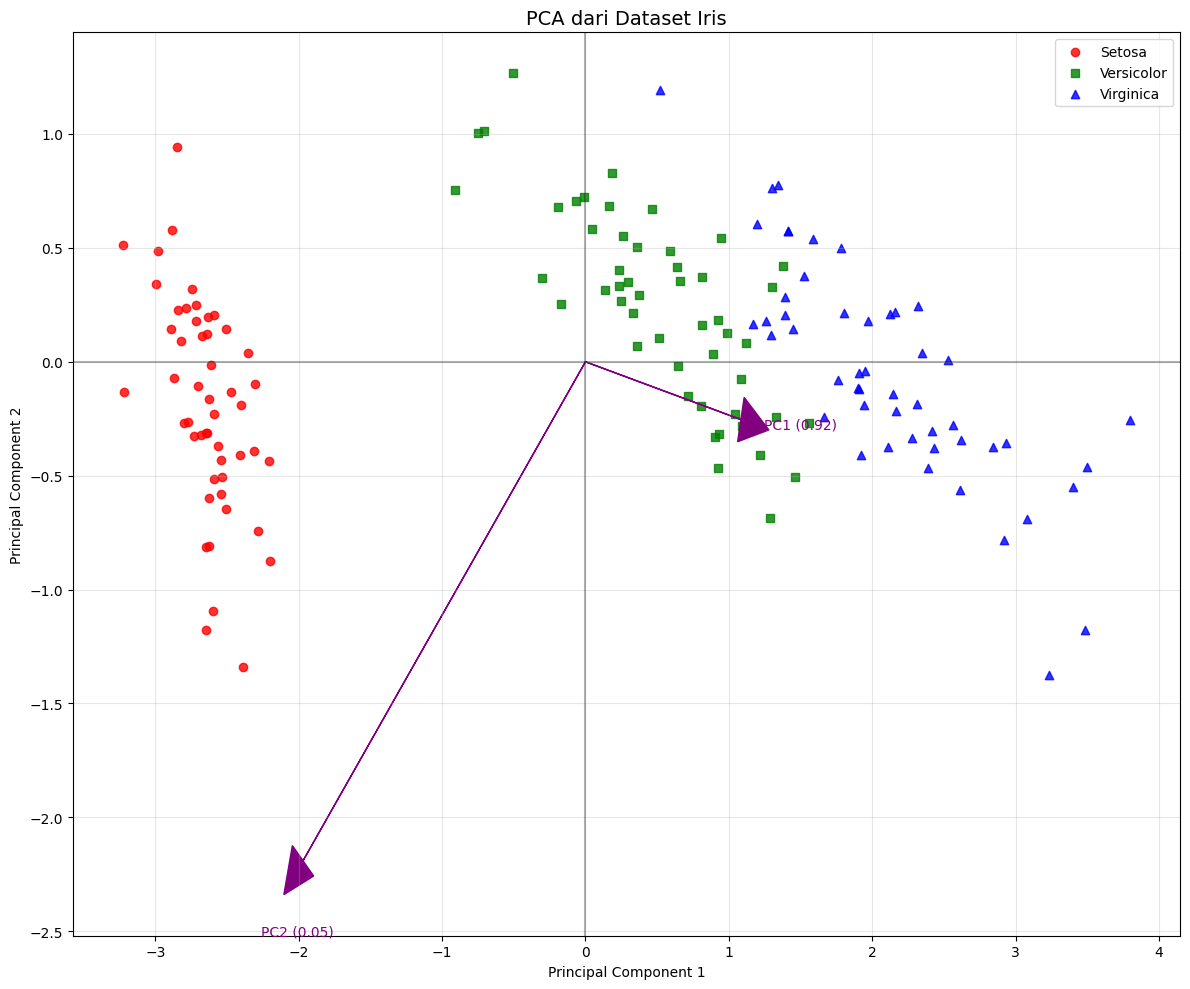

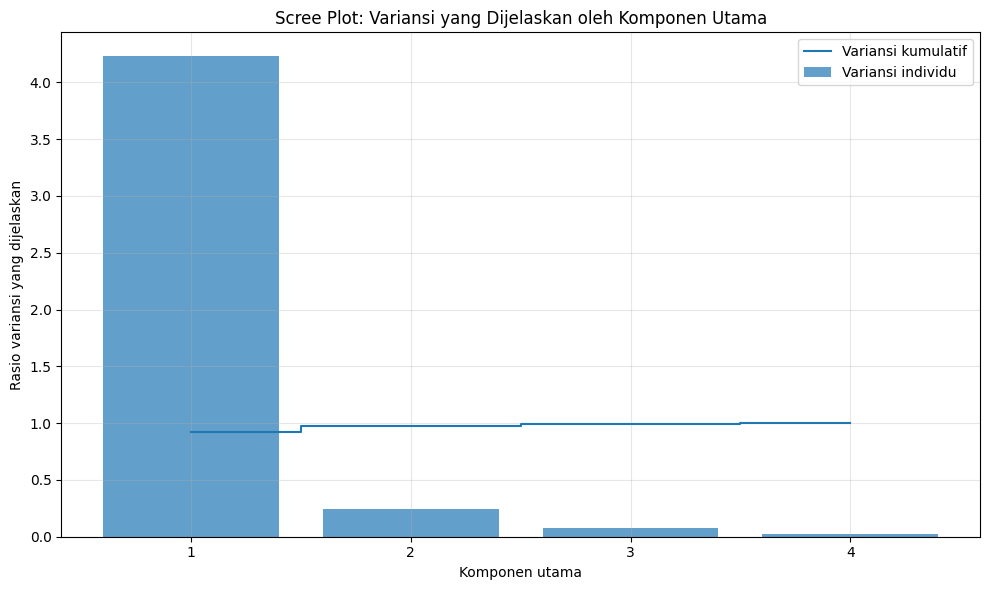

In [39]:
# Implementasi PCA dengan eigendecomposition
from sklearn import datasets
import pandas as pd

# Load dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

print(f"Dataset Iris: {X.shape[0]} sampel dengan {X.shape[1]} fitur")
print("Nama-nama fitur:", feature_names)

# Standarisasi data
X_centered = X - X.mean(axis=0)

# Menghitung matriks kovarians
cov_matrix = np.cov(X_centered, rowvar=False)
print("\nMatriks kovarians:")
print(cov_matrix)

# Hitung eigenvalues dan eigenvectors dari matriks kovarians
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Urutkan eigenvalues dan eigenvectors dari besar ke kecil
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Tampilkan eigenvalues dan persentase variansi yang dijelaskan
print("\nEigenvalues (variansi komponen utama):")
print(eigenvalues)

print("\nPersentase variansi yang dijelaskan oleh setiap komponen:")
explained_variance_ratio = eigenvalues / eigenvalues.sum()
print(explained_variance_ratio)
print(f"Dua komponen pertama menjelaskan: {100 * explained_variance_ratio[:2].sum():.2f}% variansi")

# Proyeksikan data ke 2 komponen utama
PC = X_centered @ eigenvectors[:, :2]

# Plot hasil PCA
plt.figure(figsize=(12, 10))

# Plot proyeksi data
classes = ['Setosa', 'Versicolor', 'Virginica']
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

for i, c, label, marker in zip([0, 1, 2], colors, classes, markers):
    plt.scatter(PC[y == i, 0], PC[y == i, 1], c=c, label=label, alpha=0.8, marker=marker)

# Tambahkan eigenvectors (dikalikan dengan eigenvalues untuk skala visual)
scale_factor = 3
for i in range(2):
    plt.arrow(0, 0, 
              scale_factor * eigenvectors[0, i], 
              scale_factor * eigenvectors[1, i],
              head_width=0.2, head_length=0.2, fc='purple', ec='purple')
    plt.text(scale_factor * eigenvectors[0, i] * 1.15, 
             scale_factor * eigenvectors[1, i] * 1.15,
             f'PC{i+1} ({explained_variance_ratio[i]:.2f})',
             color='purple')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA dari Dataset Iris', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Visualisasi persentase variansi yang dijelaskan oleh setiap komponen
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7, align='center',
        label='Variansi individu')
plt.step(range(1, len(eigenvalues) + 1), np.cumsum(explained_variance_ratio), 
        where='mid', label='Variansi kumulatif')

plt.ylabel('Rasio variansi yang dijelaskan')
plt.xlabel('Komponen utama')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.legend(loc='best')
plt.title('Scree Plot: Variansi yang Dijelaskan oleh Komponen Utama')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 2. Spektral Clustering

Spektral clustering menggunakan eigenvalues dan eigenvectors dari matriks Laplacian dari graf ketetanggaan untuk melakukan clustering. Teknik ini efektif untuk menemukan cluster dengan bentuk non-konveks.

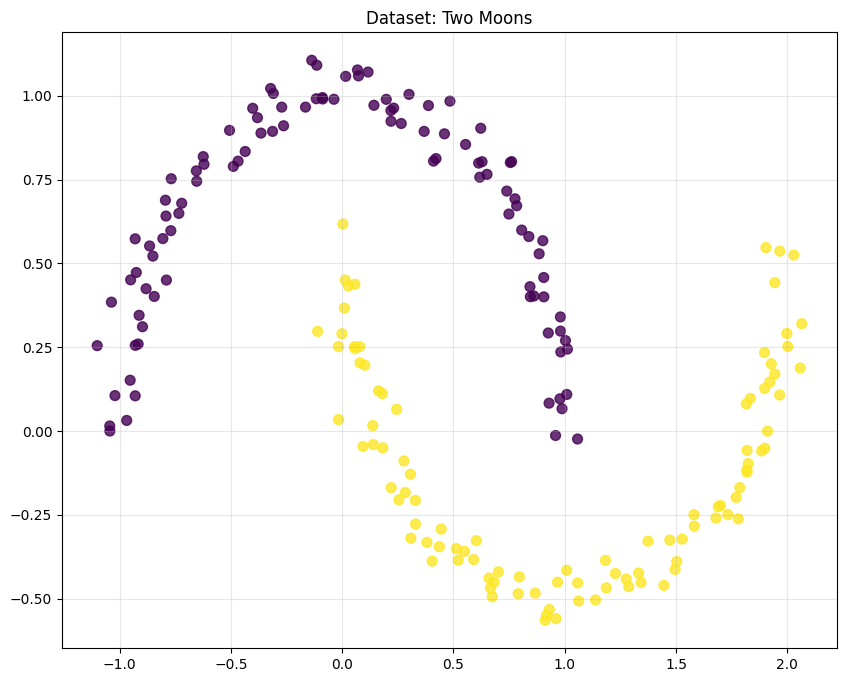

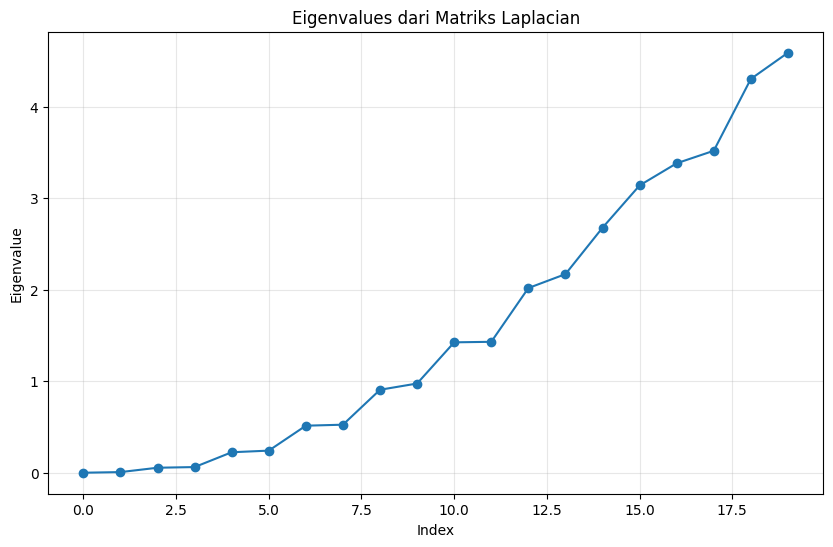

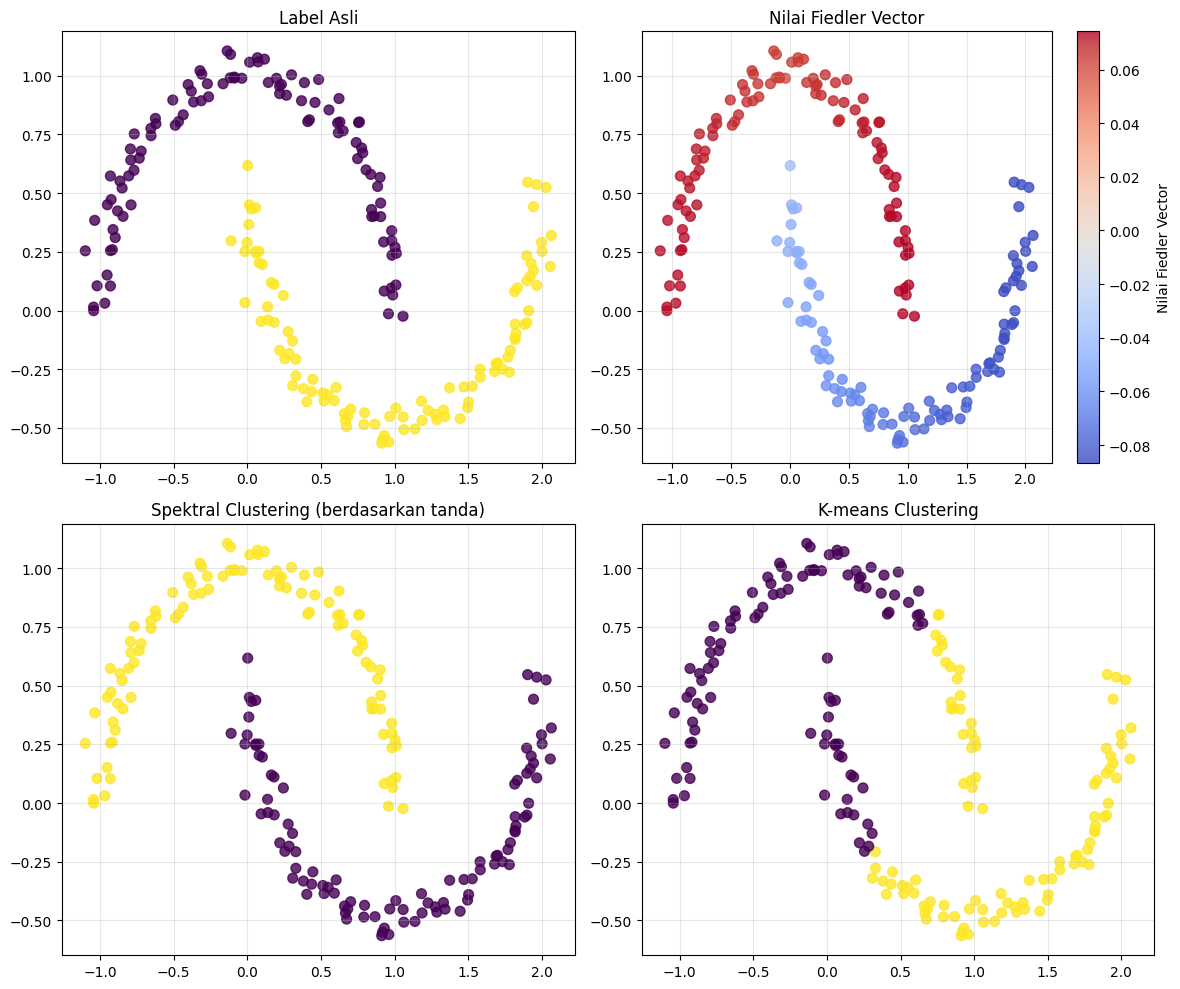

In [40]:
# Contoh spektral clustering sederhana
from sklearn.datasets import make_moons
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans

# Buat dataset dengan dua bulan
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# Plot dataset
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title('Dataset: Two Moons')
plt.grid(alpha=0.3)
plt.show()

# Langkah 1: Buat graf ketetanggaan (adjacency matrix)
# Gunakan k-nearest neighbors untuk membuat matriks kedekatan
k = 10  # Jumlah tetangga terdekat
adjacency = kneighbors_graph(X, k, mode='connectivity', include_self=False)
adjacency = 0.5 * (adjacency + adjacency.T)  # Jadikan simetris
adjacency = adjacency.toarray()

# Langkah 2: Buat matriks Laplacian
# L = D - A, di mana D adalah matriks diagonal derajat
degree = np.sum(adjacency, axis=1)
D = np.diag(degree)
L = D - adjacency

# Langkah 3: Hitung eigenvalues dan eigenvectors dari Laplacian
eigenvalues_L, eigenvectors_L = np.linalg.eigh(L)

# Plot eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues_L[:20], 'o-')
plt.grid(alpha=0.3)
plt.title('Eigenvalues dari Matriks Laplacian')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()

# Langkah 4: Pilih eigenvector kedua (Fiedler vector) untuk partisi
fiedler_vector = eigenvectors_L[:, 1]

# Plot dataset dengan warna berdasarkan Fiedler vector
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title('Label Asli')
plt.grid(alpha=0.3)

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=fiedler_vector, cmap='coolwarm', s=50, alpha=0.8)
plt.colorbar(label='Nilai Fiedler Vector')
plt.title('Nilai Fiedler Vector')
plt.grid(alpha=0.3)

# Langkah 5: Cluster berdasarkan tanda Fiedler vector (pendekatan sederhana)
# Bisa juga menggunakan k-means pada eigenvectors
spectral_labels = (fiedler_vector > 0).astype(int)

plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Spektral Clustering (berdasarkan tanda)')
plt.grid(alpha=0.3)

# Langkah 6: Bandingkan dengan K-means standar
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.subplot(224)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('K-means Clustering')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 3. Google PageRank

Algoritma PageRank yang digunakan oleh Google untuk memeringkat halaman web menggunakan eigenvector utama (principal eigenvector) dari matriks kedekatan web yang dimodifikasi. Ini adalah contoh penggunaan teorema Perron-Frobenius dalam konteks praktis.

In [41]:
# Simulasi sederhana algoritma PageRank
import networkx as nx

# Buat graf contoh (situs web dan tautannya)
G = nx.DiGraph()

# Tambahkan node (situs web)
websites = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(websites)

# Tambahkan edge (tautan antar situs)
G.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'C'), ('B', 'E'),
    ('C', 'A'), ('C', 'D'),
    ('D', 'B'), ('D', 'C'),
    ('E', 'A'), ('E', 'D')
])

# Visualisasi graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue',
       font_size=15, font_weight='bold', arrows=True, arrowsize=20)
plt.title('Graf Web Sederhana')
plt.show()

# Implementasi algoritma PageRank
# 1. Buat matriks kedekatan
adjacency_matrix = nx.to_numpy_array(G)
print("Matriks kedekatan:")
print(adjacency_matrix)

# 2. Normalisasi matriks (bagi setiap baris dengan jumlah link keluar)
# Jika tidak ada link keluar, beri probabilitas merata ke semua node
outgoing_links = np.sum(adjacency_matrix, axis=1)
n = len(websites)

# Matriks transisi Markov
transition_matrix = np.zeros((n, n))
for i in range(n):
    if outgoing_links[i] > 0:
        transition_matrix[i, :] = adjacency_matrix[i, :] / outgoing_links[i]
    else:
        transition_matrix[i, :] = 1.0 / n  # Probabilitas merata

print("\nMatriks transisi:")
print(transition_matrix)

# 3. Tambahkan damping factor (d = 0.85)
damping = 0.85
google_matrix = damping * transition_matrix.T + (1 - damping) / n * np.ones((n, n))

print("\nMatriks Google:")
print(google_matrix)

# 4. Metode Power Iteration untuk menemukan eigenvector utama
def power_iteration(A, num_iterations=100, tol=1e-6):
    n = A.shape[0]
    # Mulai dengan vektor acak
    x = np.random.rand(n)
    x = x / np.linalg.norm(x, 1)  # Normalisasi
    
    for i in range(num_iterations):
        x_new = A @ x
        x_new = x_new / np.linalg.norm(x_new, 1)  # Normalisasi
        
        # Periksa konvergensi
        if np.linalg.norm(x_new - x, 1) < tol:
            return x_new, i+1
        
        x = x_new
    
    return x, num_iterations

# Hitung PageRank dengan power iteration
pagerank, iterations = power_iteration(google_matrix)
print(f"\nPageRank konvergen setelah {iterations} iterasi:")
pagerank_dict = {website: rank for website, rank in zip(websites, pagerank)}
for website, rank in sorted(pagerank_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{website}: {rank:.4f}")

# Hitung eigenvalues dan eigenvectors dari matriks Google
eigenvalues_google, eigenvectors_google = np.linalg.eig(google_matrix)

# Cari indeks eigenvalue 1 (atau yang paling dekat dengan 1)
idx = np.argmin(np.abs(eigenvalues_google - 1.0))
principal_eigenvector = np.abs(eigenvectors_google[:, idx])
principal_eigenvector = principal_eigenvector / np.sum(principal_eigenvector)

print("\nPrincipal eigenvector (eigendecomposition):")
eigen_pagerank = {website: rank for website, rank in zip(websites, principal_eigenvector)}
for website, rank in sorted(eigen_pagerank.items(), key=lambda x: x[1], reverse=True):
    print(f"{website}: {rank:.4f}")

# Visualisasi graf dengan ukuran node berdasarkan PageRank
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, 
       node_size=[pagerank[i] * 10000 for i in range(len(pagerank))], 
       node_color='lightblue', font_size=15, font_weight='bold', 
       arrows=True, arrowsize=20)
plt.title('Graf Web dengan Ukuran Node Berdasarkan PageRank')
plt.show()

ModuleNotFoundError: No module named 'networkx'

### 4. Dekomposisi Nilai Singular (Singular Value Decomposition, SVD)

SVD adalah generalisasi dari eigendecomposition untuk matriks non-persegi. SVD adalah fondasi bagi banyak teknik dalam machine learning, termasuk PCA, LSA (Latent Semantic Analysis), dan sistem rekomendasi.

Matriks A:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Dimensi: (3, 4)

Matriks U:
[[ 0.20673589  0.88915331  0.40824829]
 [ 0.51828874  0.25438183 -0.81649658]
 [ 0.82984158 -0.38038964  0.40824829]]
Dimensi: (3, 3)

Nilai singular (s):
[2.54368356e+01 1.72261225e+00 5.14037515e-16]

Matriks V^T:
[[ 0.40361757  0.46474413  0.52587069  0.58699725]
 [-0.73286619 -0.28984978  0.15316664  0.59618305]
 [ 0.44527162 -0.83143156  0.32704826  0.05911168]
 [ 0.3189564  -0.09338934 -0.77009054  0.54452347]]
Dimensi: (4, 4)

Matriks diagonal S:
[[2.54368356e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.72261225e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.14037515e-16 0.00000000e+00]]

Rekonstruksi A = U * S * V^T:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
A ≈ U*S*V^T? True


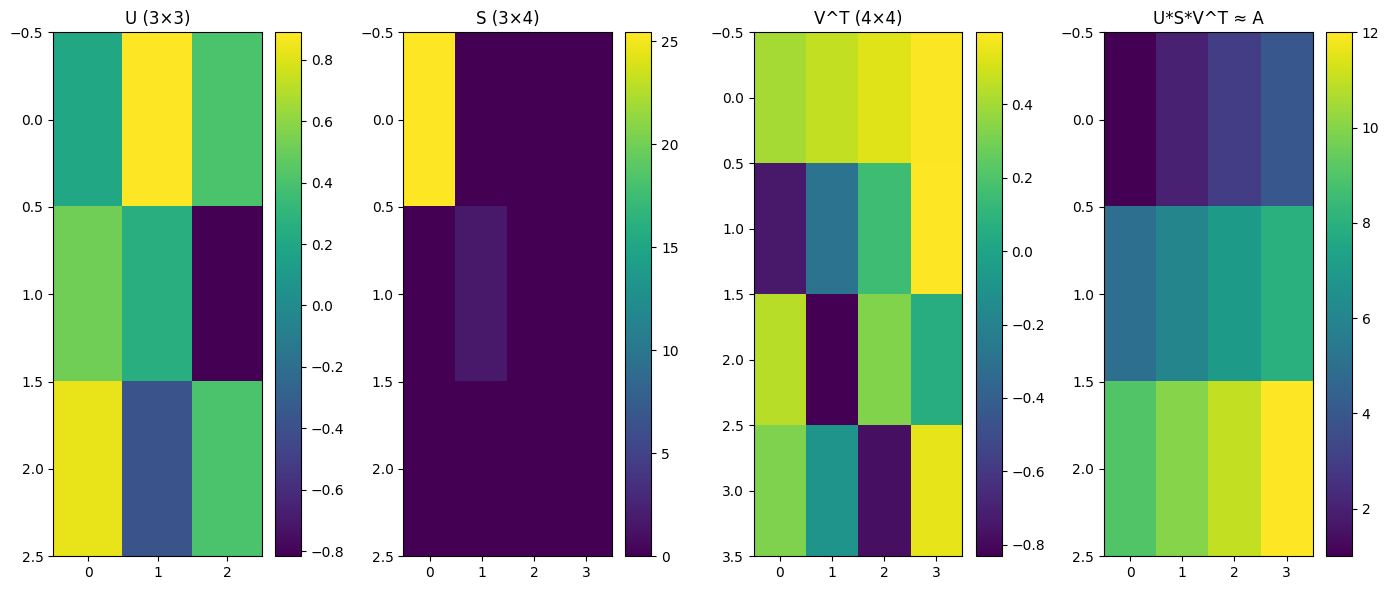


Aproksimasi rank-2 dari A:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


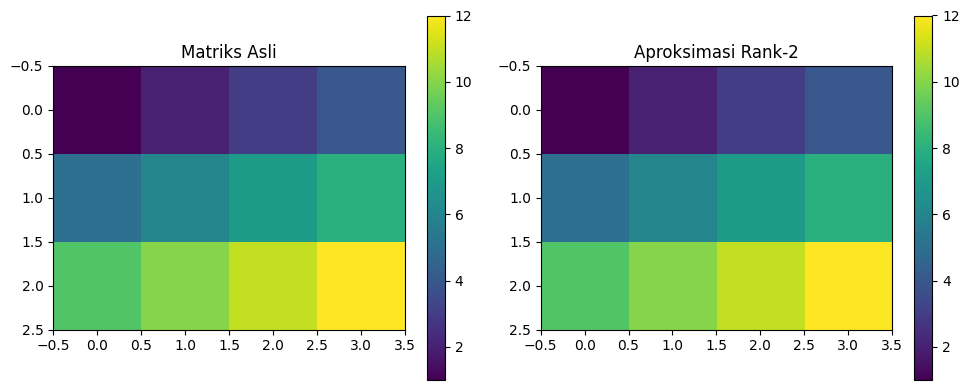


Error aproksimasi (Frobenius norm): 0.0000


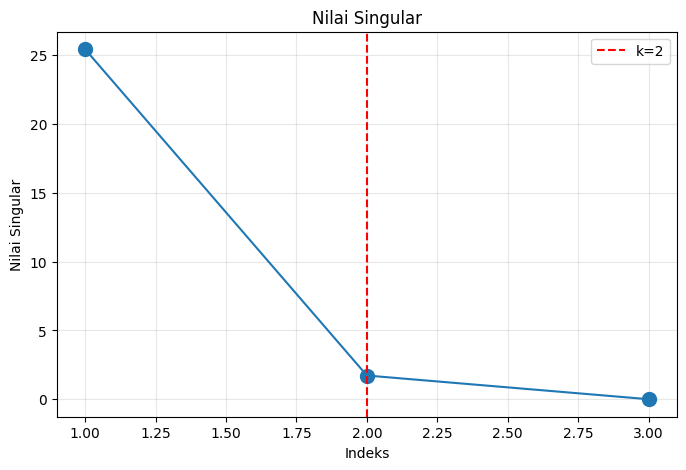

In [42]:
# Demonstrasi Singular Value Decomposition (SVD)
# SVD memecah matriks A menjadi U * S * V^T

# Buat matriks contoh non-persegi
A = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print("Matriks A:")
print(A)
print(f"Dimensi: {A.shape}")

# Lakukan SVD
U, s, VT = np.linalg.svd(A)

print("\nMatriks U:")
print(U)
print(f"Dimensi: {U.shape}")

print("\nNilai singular (s):")
print(s)

print("\nMatriks V^T:")
print(VT)
print(f"Dimensi: {VT.shape}")

# Buat matriks diagonal S dari nilai singular
# Perhatikan bahwa S adalah matriks diagonal dengan ukuran yang sama dengan A
S = np.zeros_like(A, dtype=float)
np.fill_diagonal(S, s)

print("\nMatriks diagonal S:")
print(S)

# Rekonstruksi A dari U, S, dan V^T
A_reconstructed = U @ S @ VT
print("\nRekonstruksi A = U * S * V^T:")
print(A_reconstructed)
print(f"A ≈ U*S*V^T? {np.allclose(A, A_reconstructed)}")

# Visualisasi SVD sebagai perkalian matriks
plt.figure(figsize=(14, 6))

plt.subplot(141)
plt.imshow(U, cmap='viridis', aspect='auto')
plt.title('U (3×3)')
plt.colorbar()

plt.subplot(142)
plt.imshow(S, cmap='viridis', aspect='auto')
plt.title('S (3×4)')
plt.colorbar()

plt.subplot(143)
plt.imshow(VT, cmap='viridis', aspect='auto')
plt.title('V^T (4×4)')
plt.colorbar()

plt.subplot(144)
plt.imshow(A_reconstructed, cmap='viridis', aspect='auto')
plt.title('U*S*V^T ≈ A')
plt.colorbar()

plt.tight_layout()
plt.show()

# Aplikasi: Kompresi matriks dengan SVD rendah (low-rank approximation)
# Kita dapat mengaproksimasikan A dengan menggunakan hanya k nilai singular tertinggi
k = 2  # Gunakan hanya 2 komponen terbesar

# Hanya gunakan k kolom pertama dari U, k nilai singular, dan k baris pertama dari V^T
U_k = U[:, :k]
s_k = s[:k]
VT_k = VT[:k, :]

# Buat matriks S_k
S_k = np.zeros((k, k), dtype=float)
np.fill_diagonal(S_k, s_k)

# Rekonstruksi dengan aproksimasi rank-k
A_k = U_k @ S_k @ VT_k
print("\nAproksimasi rank-2 dari A:")
print(A_k)

# Visualisasi aproksimasi low-rank
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.imshow(A, cmap='viridis')
plt.title('Matriks Asli')
plt.colorbar()

plt.subplot(122)
plt.imshow(A_k, cmap='viridis')
plt.title(f'Aproksimasi Rank-{k}')
plt.colorbar()

plt.tight_layout()
plt.show()

# Hitung error aproksimasi
error = np.linalg.norm(A - A_k, 'fro')  # Frobenius norm
print(f"\nError aproksimasi (Frobenius norm): {error:.4f}")

# Plot nilai singular
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(s) + 1), s, 'o-', markersize=10)
plt.axvline(x=k, color='r', linestyle='--', label=f'k={k}')
plt.grid(alpha=0.3)
plt.xlabel('Indeks')
plt.ylabel('Nilai Singular')
plt.title('Nilai Singular')
plt.legend()
plt.show()

## Kesimpulan

Dalam notebook ini, kita telah mempelajari konsep eigenvalues dan eigenvectors serta aplikasinya dalam machine learning:

1. **Definisi dan Intuisi**: Eigenvalues dan eigenvectors adalah nilai dan vektor khusus di mana transformasi linear (matriks) hanya mengubah panjang vektor tanpa mengubah arahnya.

2. **Perhitungan**: Eigenvalues ditemukan dengan menyelesaikan persamaan karakteristik det(A - λI) = 0, dan eigenvectors ditemukan dengan menyelesaikan (A - λI)v = 0.

3. **Sifat-sifat**: Eigenvalues dan eigenvectors memiliki berbagai sifat penting seperti kaitan dengan determinan dan trace, serta sifat-sifat khusus untuk matriks simetris.

4. **Diagonalisasi**: Matriks dengan n eigenvectors linear independen dapat ditulis sebagai A = PDP^(-1), di mana D adalah matriks diagonal dengan eigenvalues.

5. **Aplikasi dalam Machine Learning**:
   - PCA untuk reduksi dimensi
   - Spektral clustering
   - PageRank (algoritma pencarian Google)
   - SVD untuk kompresi data dan sistem rekomendasi

Eigenvalues dan eigenvectors adalah konsep fundamental dalam aljabar linear yang memungkinkan kita memahami struktur internal dari transformasi linear dan matriks. Pemahaman yang kuat tentang konsep ini sangat penting untuk mengembangkan dan memahami berbagai algoritma machine learning.

## Latihan

1. Hitung eigenvalues dan eigenvectors untuk matriks 3×3 secara manual dan verifikasi bahwa A×v = λ×v.
2. Implementasikan PCA dari awal (tanpa menggunakan scikit-learn) dan terapkan pada dataset UCI Wine.
3. Gunakan SVD untuk mengompresi gambar dan bandingkan hasil untuk berbagai level aproksimasi.
4. Implementasikan algoritma PageRank sederhana dan terapkan pada jaringan sosial.

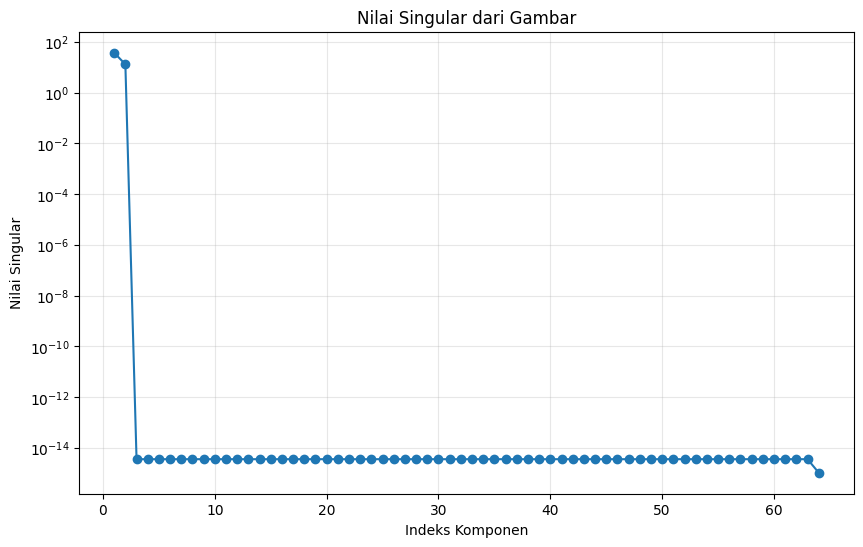

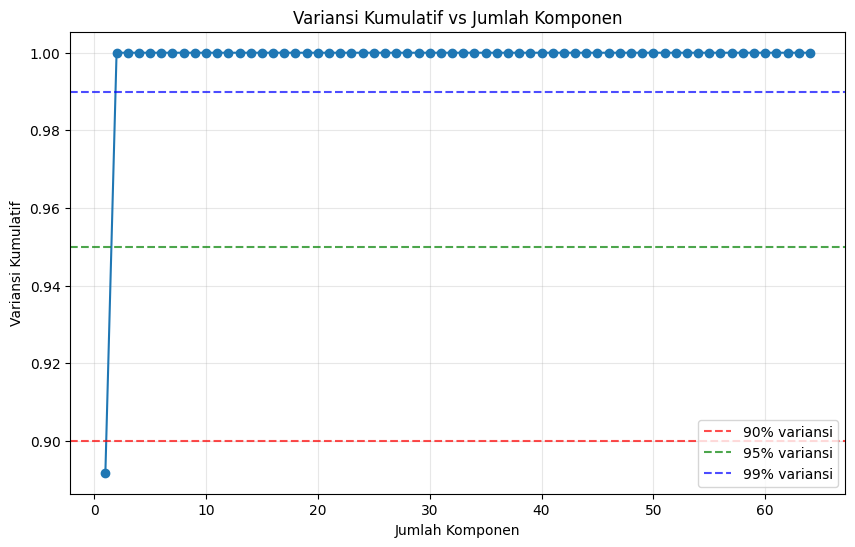

Komponen yang diperlukan untuk 80% variansi: 1 dari 64
Komponen yang diperlukan untuk 90% variansi: 2 dari 64
Komponen yang diperlukan untuk 95% variansi: 2 dari 64
Komponen yang diperlukan untuk 99% variansi: 2 dari 64


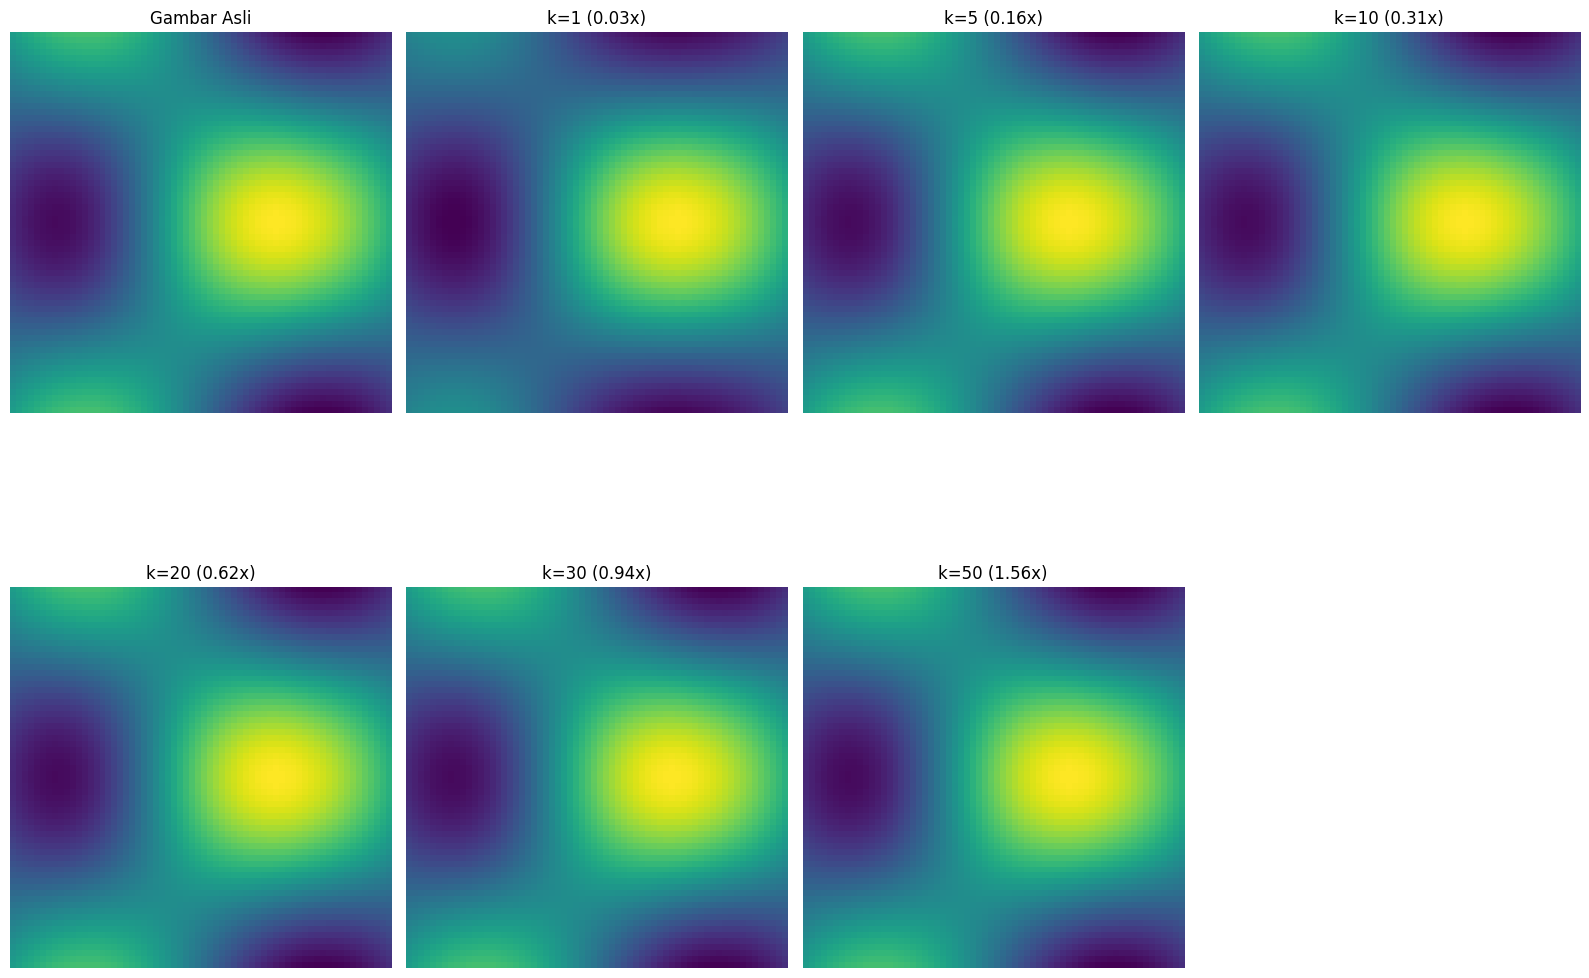

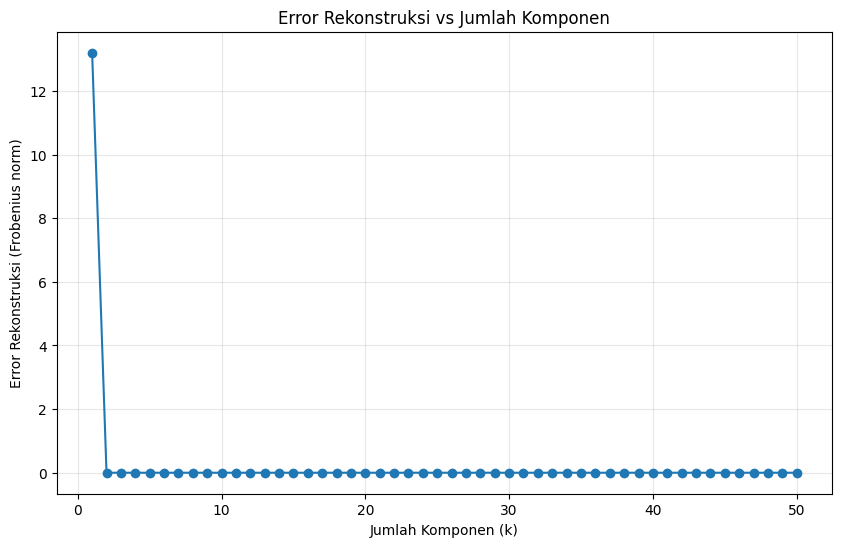

In [43]:
# Latihan: Implementasi SVD untuk kompresi gambar sederhana

# Buat gambar sintetis sederhana
def create_synthetic_image(size=128):
    """Buat gambar sintetis dengan pola sederhana"""
    x = np.linspace(-5, 5, size)
    y = np.linspace(-5, 5, size)
    X, Y = np.meshgrid(x, y)
    
    # Buat pola dengan beberapa fungsi
    Z = np.sin(X*0.5) * np.cos(Y*0.5) + np.exp(-(X**2 + Y**2)/10)
    
    return Z

# Buat gambar
image_size = 64
image = create_synthetic_image(image_size)

# Terapkan SVD
U, s, VT = np.linalg.svd(image)

# Visualisasi nilai singular
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(s) + 1), s, 'o-')
plt.grid(alpha=0.3)
plt.xlabel('Indeks Komponen')
plt.ylabel('Nilai Singular')
plt.title('Nilai Singular dari Gambar')
plt.yscale('log')  # Skala logaritmik untuk melihat perbedaan dengan lebih jelas
plt.show()

# Hitung persentase variansi yang dijelaskan
explained_variance = (s**2) / (s**2).sum()
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(s) + 1), cumulative_variance, 'o-')
plt.grid(alpha=0.3)
plt.xlabel('Jumlah Komponen')
plt.ylabel('Variansi Kumulatif')
plt.title('Variansi Kumulatif vs Jumlah Komponen')
plt.axhline(y=0.9, color='r', linestyle='--', alpha=0.7, label='90% variansi')
plt.axhline(y=0.95, color='g', linestyle='--', alpha=0.7, label='95% variansi')
plt.axhline(y=0.99, color='b', linestyle='--', alpha=0.7, label='99% variansi')
plt.legend()
plt.show()

# Temukan jumlah komponen untuk mencapai tingkat variansi tertentu
variances = [0.8, 0.9, 0.95, 0.99]
components_needed = []

for var in variances:
    n_components = np.argmax(cumulative_variance >= var) + 1
    components_needed.append(n_components)
    print(f"Komponen yang diperlukan untuk {var*100:.0f}% variansi: {n_components} dari {len(s)}")

# Visualisasi rekonstruksi dengan jumlah komponen yang berbeda
ranks = [1, 5, 10, 20, 30, 50, image_size]  # k berbeda

plt.figure(figsize=(16, 12))
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='viridis')
plt.title('Gambar Asli')
plt.axis('off')

for i, k in enumerate(ranks[:-1], 2):
    # Rekonstruksi dengan k komponen
    reconst = np.zeros_like(image)
    
    for j in range(k):
        reconst += s[j] * np.outer(U[:, j], VT[j, :])
    
    # Kompresi ratio
    compression_ratio = (k * (image.shape[0] + image.shape[1])) / (image.shape[0] * image.shape[1])
    
    plt.subplot(2, 4, i)
    plt.imshow(reconst, cmap='viridis')
    plt.title(f'k={k} ({compression_ratio:.2f}x)')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Hitung error rekonstruksi untuk berbagai nilai k
k_values = range(1, 51)
errors = []

for k in k_values:
    # Rekonstruksi dengan k komponen
    reconst = np.zeros_like(image)
    
    for j in range(k):
        reconst += s[j] * np.outer(U[:, j], VT[j, :])
    
    # Hitung error (Frobenius norm)
    error = np.linalg.norm(image - reconst, 'fro')
    errors.append(error)

# Plot error vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, 'o-')
plt.grid(alpha=0.3)
plt.xlabel('Jumlah Komponen (k)')
plt.ylabel('Error Rekonstruksi (Frobenius norm)')
plt.title('Error Rekonstruksi vs Jumlah Komponen')
plt.show()